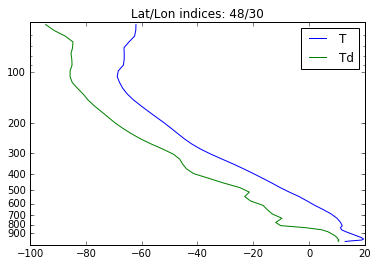

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4

class WRFPlay(object):
    dataset = " ";
    def __init__(self, ncfilepath):
        self.dataset = netCDF4.Dataset(ncfilepath, 'r')
        
    
    def sounding_plot(self, latindex, lonindex):
        # 3D mositure - QVAPOR
        # Read the data into a NumPy array
        QVAPOR = dataset.variables['QVAPOR'][:]

        LAT_INDEX = latindex # This is the south_north dimension in the NetCDF file
        LON_INDEX= lonindex # This is the west-east dimension in the NetCDF File

       



        # Let's get the P and PB arrays
        P = dataset.variables['P'][:] # the perturbation pressure
        PB = dataset.variables['PB'][:] # the base state pressure

        # Create the total pressure millibar field
        P_mb = (P + PB) * 0.01

        # let's get the 3d array of temperature in degrees C
        theta = dataset.variables['T'][:] + 300.0 # convert petrubation potential temperature in Kelvin
        T_c = theta*((P_mb)/1000.0)**(2.0/7.0) -273.0

        # let's get the dew point
        # As per the formula dewpoint T = B/ln(X) where X = Ae/wp
        A = 2.53 * (10**9) # coversion from 1 kPa = 10 mbar
        B = 5.42 * (10**3)
        e = 0.622
        w = QVAPOR
        p = P_mb  

        x= (A*e)/(w*p)
        T_d = B / (np.log(0.622 * 2.53 * (10**9)/np.multiply(QVAPOR,P_mb)))
        T_d = T_d - 273.15 #convert to celsius

        
        #Vertical plot
        t_sounding = T_c[0,:,LAT_INDEX,LON_INDEX]
        t_d_sounding = T_d[0,:,LAT_INDEX,LON_INDEX]
        p_sounding = P_mb[0,:,LAT_INDEX,LON_INDEX]
        plt.semilogy(t_sounding, p_sounding,  label='T')
        plt.semilogy(t_d_sounding, p_sounding, color='green', label='Td')
        plt.legend(loc='upper right')
        plt.title('Lat/Lon indices: ' + str(LAT_INDEX) +'/' + str(LON_INDEX))
        plt.ylim(ymin=50.0, ymax=1050.0)
        plt.gca().invert_yaxis()

        #Set up ticks and labels on the y-axis
        ylocations = np.arange(100,1000,100)
        plt.yticks(ylocations, ylocations)
        
        plt.show()
    
    def close(self):
        self.dataset.close();
        
WRFOUT_FILE_PATH = 'wrfout_d01_2017-09-09_12:00:00'
W = WRFPlay(ncfilepath=WRFOUT_FILE_PATH)
W.sounding_plot(lonindex=30,latindex=48)

W.close()